# Ampere Altra STREAM: Software Bandwidth vs. Software Bandwidth

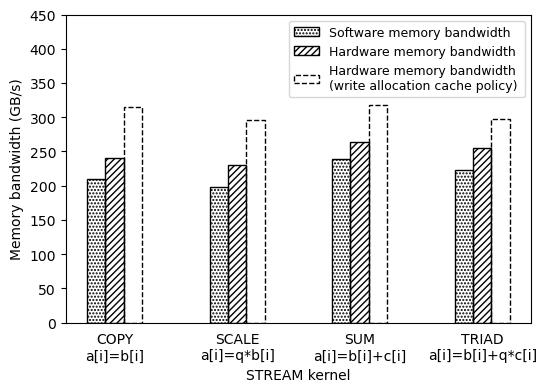

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
group_labels = ['COPY\na[i]=b[i]', 
                'SCALE\na[i]=q*b[i]', 
                'SUM\na[i]=b[i]+c[i]', 
                'TRIAD\na[i]=b[i]+q*c[i]']
sw_bandwidth = [210299.78, 197566.32, 238588.01, 222579.93]
hw_bandwidth = [240342.56, 230186.44, 264398.08, 254331.14]
est_hw_bandwidth = [
    sw_bandwidth[0] / 2 * 3,
    sw_bandwidth[1] / 2 * 3,
    sw_bandwidth[2] / 3 * 4,
    sw_bandwidth[3] / 3 * 4
]

# 转换为 GB
sw_bandwidth = [x * 0.001 for x in sw_bandwidth]
hw_bandwidth = [x * 0.001 for x in hw_bandwidth]
est_hw_bandwidth = [x * 0.001 for x in est_hw_bandwidth]

# 设置柱状图的参数
bar_width = 0.15  # 每个柱子的宽度
index = np.arange(len(group_labels))  # 组的索引

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 绘制柱状图
bar1 = ax.bar(index, sw_bandwidth, bar_width, label='Software memory bandwidth',
              fill=False, hatch='.....')
bar2 = ax.bar(index + bar_width, hw_bandwidth, bar_width, label='Hardware memory bandwidth',
              fill=False, hatch='/////')
bar3 = ax.bar(index + 2 * bar_width, est_hw_bandwidth, bar_width, label='Hardware memory bandwidth \n(write allocation cache policy)',
              fill=False, edgecolor='black', linestyle='--')

# 添加标签和标题
ax.set_xlabel('STREAM kernel')
ax.set_ylabel('Memory bandwidth (GB/s)')
ax.set_ylim(0, 450)
ax.set_xticks(index + 1 * bar_width)
ax.set_xticklabels(group_labels)
ax.legend(prop={'size': 9})

# 去掉 x 轴上的 ticks
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

# 在 y 轴的每个刻度上添加水平虚线
ax.grid(axis='y', linestyle='--', linewidth=0.7)

# 保存图形为 PDF 文件
plt.savefig('memory_bandwidth.pdf', format='pdf')

# 显示图形
plt.show()